In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from accretion import*
from Luca import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# When β = β_Hubble

def λ_pbh_β_Hubble(z, m):
    def β_cap_pbh(z, m):
        return 1e-4 * m * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/v_eff(z))**3) * (0.257 )
    def x_cr_pbh(z, m):
            return (-1 + np.sqrt(1 + β_cap_pbh(z, m)))/β_cap_pbh(z, m) 
    return np.exp((9/2)/(3 + β_cap_pbh(z, m)**(0.75))) * (x_cr_pbh(z, m)**2)

  
    
def λ_halo_β_Hubble(z, m):
    def M_halo(z, m):
        return 3 * m * (((1+z)/1000)**(-1))
    def β_cap_halo_pointmass(z, m):
        return 1e-4 * (M_halo(z, m)) * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (0.257)
    def x_cr_halo_pointmass(z, m):
        return   ((-1 + np.sqrt(1 + β_cap_halo_pointmass(z, m)))/β_cap_halo_pointmass(z, m)) #((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m))
    return np.exp((9/2)/(3 + β_cap_halo_pointmass(z, m)**(0.75))) * (x_cr_halo_pointmass(z, m)**2)


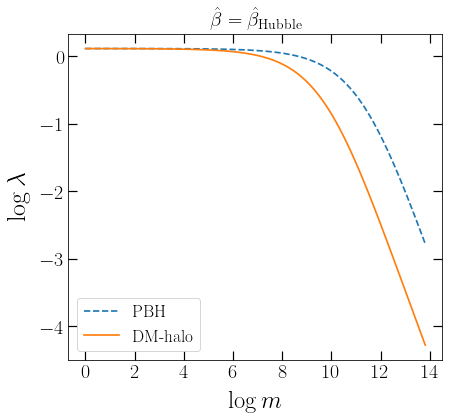

In [2]:
colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig,ax = plt.subplots(1, figsize = (6.7, 6))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')



m_arr = np.geomspace(1, 1e6, 100)
λ_halo_arr = np.zeros(len(m_arr))
λ_pbh_arr = np.zeros(len(m_arr))

z = 1000
for i, m in enumerate(m_arr):
    λ_halo_arr[i] = λ_halo_β_Hubble(z, m)
    λ_pbh_arr[i] = λ_pbh_β_Hubble(z, m)
plt.plot(np.log(m_arr), np.log(λ_pbh_arr),  ls = '--')
plt.plot(np.log(m_arr), np.log(λ_halo_arr))
    

plt.xlabel('$\mathrm{log} \,m $',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{log}\, \lambda$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'$\hat \beta  = \hat \beta_\mathrm{Hubble}$', fontsize = 20, pad = 8)
plt.legend( ['PBH' ,  'DM-halo'],
           title_fontsize = 12, loc = 'lower left', prop = {"size":17.3})
plt.savefig('beta_Hubble.pdf', bbox_inches = 'tight')
plt.show()

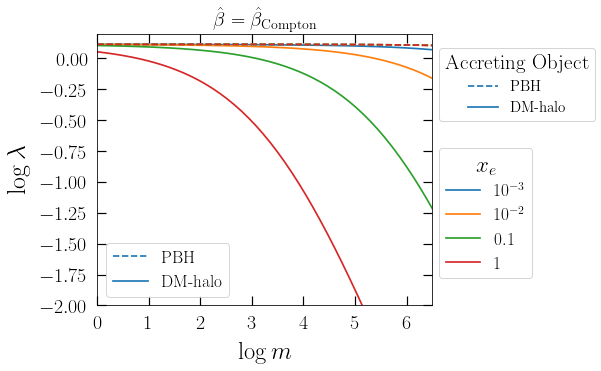

In [10]:
# When β = β_Compton

def λ_pbh_β_Compton(z, m):
    y = np.array(m, dtype = np.longdouble)
    def c_s(z):
        β = 1.72
        z_dec = 130
        return  5.74e3 * np.sqrt((1+z)/1000) * (((((1+z_dec)/(1 + z))**β) + 1)**(-1/(2 * β))) * (yr/pc)

    def β_cap(z, m):
        return 1e-4 * y * (((1+z)/1000)**(3/2)) *  ((5.74e3 * (yr/pc)/v_eff(z))**3) * (0.257)
    
    def x_cr(z, m):
        return (-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m)
    
    return np.exp((9/2)/ (3 + β_cap(z, m)*(3/4))) * (x_cr(z, m)**2)



 

def λ_halo_β_Compton(z, m):
    def M_halo(z, m):
        return 3 * m * (((1+z)/1000)**(-1))
    def β_cap_halo_pointmass(z, m):
        return 1e-4 * (M_halo(z, m)) * (((1+z)/1000)**(3/2)) * (((5.74e3 * (yr/pc))/c_s(z))**3) * (1.45 * (x_e/0.01) * (((1+z)/1000)**(5/2)))
    def x_cr_halo_pointmass(z, m):
        return   ((-1 + np.sqrt(1 + β_cap_halo_pointmass(z, m)))/β_cap_halo_pointmass(z, m)) #((-1 + np.sqrt(1 + β_cap(z, m)))/β_cap(z, m))
    return np.exp((9/2)/(3 + β_cap_halo_pointmass(z, m)**(0.75))) * (x_cr_halo_pointmass(z, m)**2)



colors = ['C0', 'C1','C2','C3','C4', 'C5']
fig, ax = plt.subplots(1, figsize = (6, 5))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


 #in units of M_solar
z = 1000
x_e_arr = np.array([1e-3, 1e-2, 0.1, 1])
m_arr = np.geomspace(1, 1e6, 100)
λ_halo_arr = np.zeros(len(m_arr))
λ_pbh_arr = np.zeros(len(m_arr))
colors = ['C0', 'C1', 'C2', 'C3']

for i, (x_e, color) in enumerate(zip(x_e_arr, colors)):
    for j, m in enumerate(m_arr):
        λ_halo_arr[j] = λ_halo_β_Compton(z, m)
        λ_pbh_arr[j] = λ_pbh_β_Compton(z, m)
    plt.plot(np.log(m_arr), np.log(λ_pbh_arr), color = color,  ls = '--')
    plt.plot(np.log(m_arr), np.log(λ_halo_arr), color = color)


    
    
    
ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["PBH", "DM-halo"], title = 'Accreting Object',
        title_fontsize = 21, loc = (1.02, 0.68), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [1,3,5,7]], [ '$10^{-3}$' ,  '$10^{-2}$', '$0.1$', '$1$'], title = '$x_{e}$',
           title_fontsize = 23, loc = (1.02, 0.1), prop = {"size":17.3})

ax.add_artist(legend1)
ax.add_artist(legend2)
    
    
plt.xlim(0, 6.5)
plt.ylim(-2, 0.2)
plt.xlabel('$\mathrm{log} \,m $',  fontsize = 24.5, labelpad = 10)
plt.ylabel(' $\mathrm{log}\, \lambda$', fontsize = 26, labelpad = 10)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title(r'$\hat \beta  = \hat \beta_\mathrm{Compton}$', fontsize = 20, pad = 8)
plt.legend( ['PBH' ,  'DM-halo'],
           title_fontsize = 12, loc = 'lower left', prop = {"size":17.3})
plt.savefig('beta_Compton.pdf', bbox_inches = 'tight')
plt.show()
plt.show()